# Analyzing the Unemployment Rate in the United States

Authors: Divyaang Agarwal, Ankita Ashok Khiratkar

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from main import *
from scraper import * 

The below cell is a one-time process to web scrap data from some of our data sources. You may not run it as the web scraped data is available in the data folder in csv format.

In [2]:
scrape_table(0, './Data/BLS state job gains and losses/Gross_job_gains.csv')
scrape_table(1, './Data/BLS state job gains and losses/Gross_job_losses.csv')
scrape_state_unemp('./Data/Unemployment Rates for States/state_unemployment_11_21.csv')

## Hypothesis 1: Unemployment rate in the United States is independent of Age

Through this hypothesis we aim to check whether the unemployment rate in the United States is dependent on the Age of the individual or not.


We test the following hypothesis: <br >
**Null Hypothesis: Unemployment rate in the United States is independent of Age <br>
Alternative Hypothesis: Unemployment rate in the United States is NOT independent of Age**

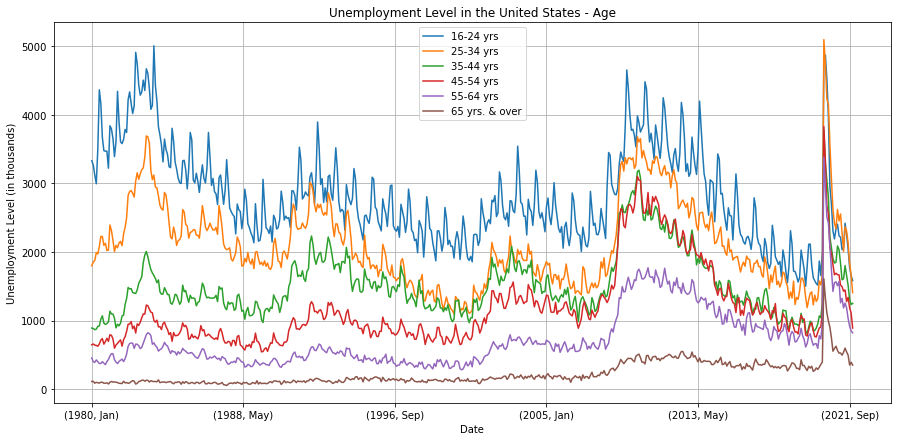

In [3]:
df_age = get_bls_data_merged(dir_path='./Data/BLS/Age/', df_merge=get_bls_dummy([1980, 2021]))
df_age.plot(figsize=(15, 7), linewidth = 1.5)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Unemployment Level (in thousands)')
plt.title('Unemployment Level in the United States - Age')
plt.show()

### Observation
1. From the above plot, we observe that the unemployment rate is inversely proportional to the age group. Higher the age group, lower is the unemployment rate.

2. Unemployment rate is highest for the age group 16 to 24 years followed by 25 to 34 years, then 35 to 44 years, then 45 to 54 years, followed by 55 to 64 years, and lastly 65 years and above.

3. Therefore, we conclude that unemployment rate is not independent of age and **reject the null hypothesis**.

### Analyzing Unemployment Rate in the United States with respect to Age during the Great Recession and the Covid-19 pandemic

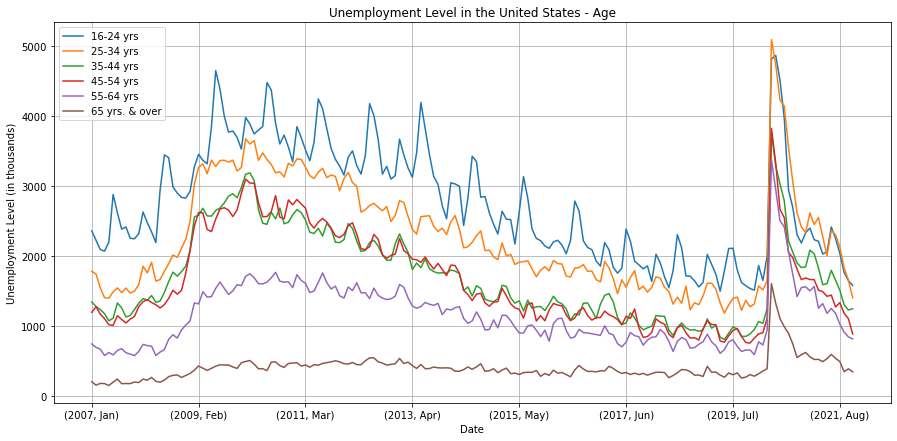

In [4]:
df_age_7 = get_bls_data_merged(dir_path='./Data/BLS/Age/', df_merge=get_bls_dummy([2007, 2021]))
df_age_7.plot(figsize=(15, 7), linewidth = 1.5)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Unemployment Level (in thousands)')
plt.title('Unemployment Level in the United States - Age')
plt.show()

### Observation

1. The unemployment rate increased for all age groups during the Great Recession period (December 2007 – June 2009). 
2. Due to the Great Recesion, age group 25 to 34 years, 35 to 44 years, and 45 to 54 years seems to be more affected as compared to other age groups.
3. The unemployment rate for all age groups reached their all time high after the Covid-19 outbreak in early 2020.
4. The effect of the Great Recession was more dominant as compared to the effect of the Covid-19 pandemic on the unemployment rate. As we notice that for all age groups, the unemployment rate took a much longer time to come down after the Great Recession as compared to the Covid-19 pandemic.

## Hypothesis 2: Unemployment rate in the United States is independent of Race

Through this hypothesis we aim to check whether the unemployment rate in the United States is dependent on the Race of the individual or not.


We test the following hypothesis: <br>
**Null Hypothesis: Unemployment rate in the United States is independent of Race <br>
Alternative Hypothesis: Unemployment rate in the United States is NOT independent of Race**

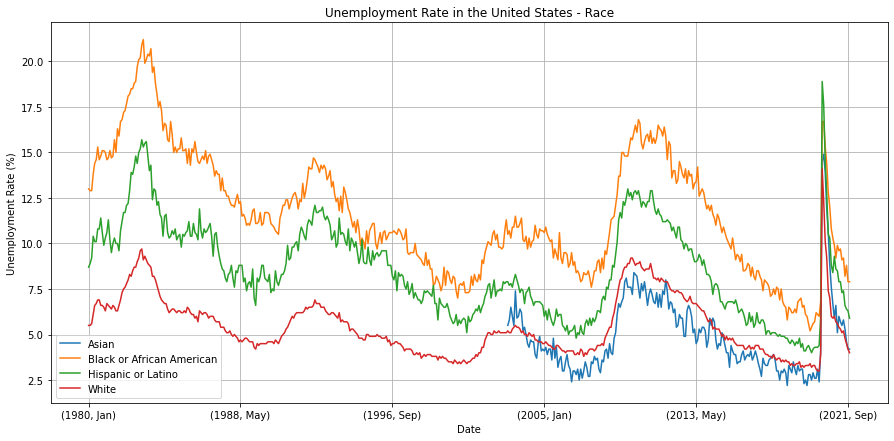

In [5]:
df_race = get_bls_data_merged(dir_path='./Data/BLS/Race/', df_merge=get_bls_dummy([1980, 2021]))
df_race.plot(figsize=(15, 7), linewidth = 1.5)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate in the United States - Race')
plt.show()

### Observation

1. Ideally, the umployment rate should be independent of race but from the plot above we infer that the unemployment rate is always highest for Black/Africans Americans and lowest for Asian people. This trend is consistent throughout the timeline- the unemployment rate is highest for Black Americans followed by Hispanic or Latino then White and then Asians. 

2. Therefore, we can say that unemployemt rate is not independent of race and we **reject the null hypothesis.**

### Analyzing Unemployment Rate in the United States with respect to Race during the Great Recession and the Covid-19 pandemic

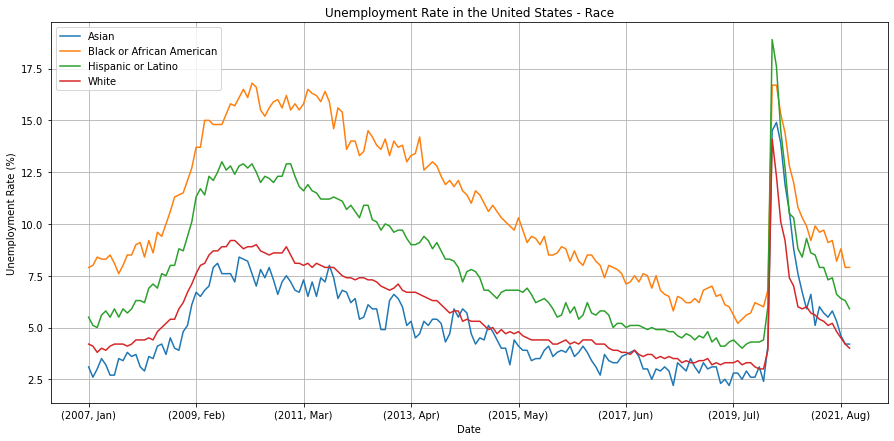

In [6]:
df_race_7 = get_bls_data_merged(dir_path='./Data/BLS/Race/', df_merge=get_bls_dummy([2007, 2021]))
df_race_7.plot(figsize=(15, 7), linewidth = 1.5)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate in the United States - Race')
plt.show()

### Observation

1. The umployment rate increased for all Races during the Great Recession (December 2007 – June 2009).

2. The umployment rate for all Races reached their all time high after the Covid-19 outbreak in early 2020.

3. We observed that for all Races, the unemployment rate took a much longer time to come down after the Great Recession as compared to the Covid-19 pandemic.

## Hypothesis 3: Unemployment rate in the United States is independent of Education Level

Through this hypothesis we aim to check whether the unemployment rate in the United States is dependent on the Education Level of the individual or not.

We test the following hypothesis: <br>
**Null Hypothesis: Unemployment rate in the United States is independent of Education Level <br>
Alternative Hypothesis: Unemployment rate in the United States is NOT independent of Education Level**

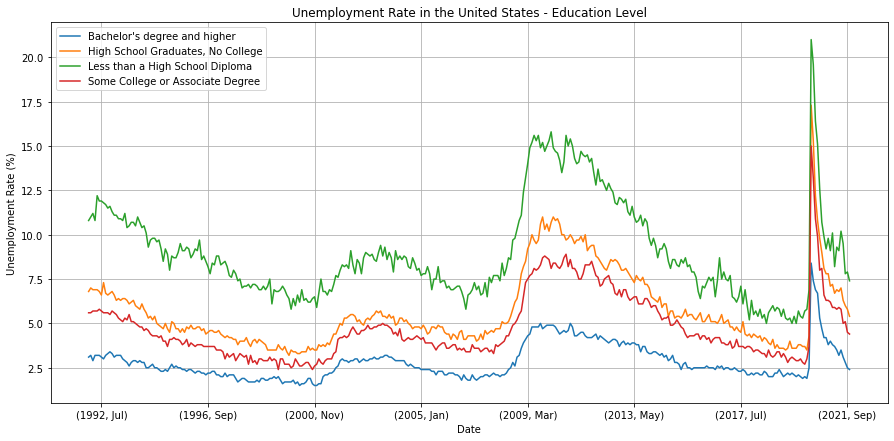

In [7]:
df_el = get_bls_data_merged(dir_path='./Data/BLS/Education/', df_merge=get_bls_dummy([1980, 2021]))
df_el.plot(figsize=(15, 7), linewidth = 1.5)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate in the United States - Education Level')
plt.show()

### Observation

1. From the plot above, we infer that the unemployment rate is inversely related to the education level. Unemployment rate is lower for people having the higher level of education. 

2. The trend of unemployment rate with respect to education level is consistent throughout the timeline- the unemployment rate is highest for people having less than a high school degree or diploma followed by high school graduates (no college) followed by some college or associate degree and lastly, bachelor's degree and higher. 

3. Thus, we conclude that unemployment rate is dependent on education level and we **reject the null hypothesis.**

### Analyzing Unemployment Rate in the United States with respect to Education Level during the Great Recession and the Covid-19 pandemic

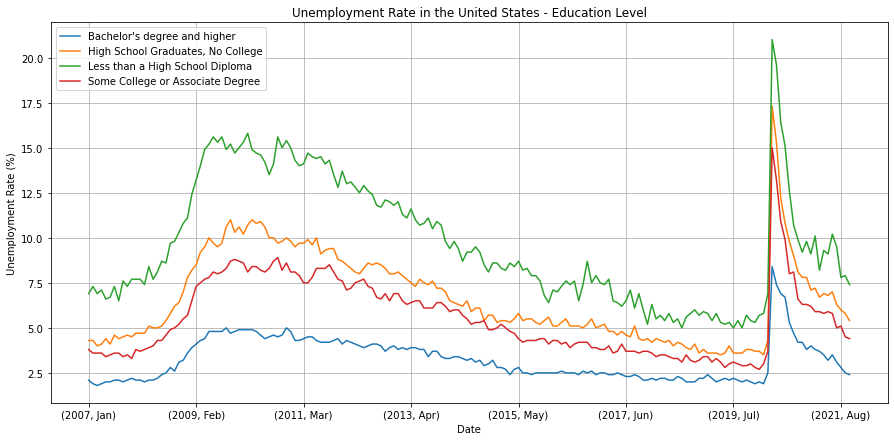

In [8]:
df_el_7 = get_bls_data_merged(dir_path='./Data/BLS/Education/', df_merge=get_bls_dummy([2007, 2021]))
df_el_7.plot(figsize=(15, 7), linewidth = 1.5)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate in the United States - Education Level')
plt.show()

### Observation

1. The uemployment rate increased for all Education Levels during the Great Recession (December 2007 – June 2009). 

2. The unemployment rate for all Education Level groups reached their all time high after the Covid-19 outbreak in early 2020.

3. During both, the Great Recession and the Covid-19 pandemic, the rise in unemployment rate for people having less than a high school diploma was higher as compared to other categories.

4. The effect of the Covid-19 pandemic on the unemployment rate was more severe as compared to the Great Recession. But, the unemployment rate took a much longer time to come down after the Great Recession as compared to the Covid-19 pandemic.

## Hypothesis 4: Duration for which people are unemployed is independent of Time

Through this hypothesis we aim to check whether the duration for which people are unemployed is dependent on time or not.


We test the following hypothesis: <br>
**Null Hypothesis: Duration for which people are unemployed is independent of time <br>
Alternative Hypothesis: Duration for which people are unemployed is NOT independent of time**

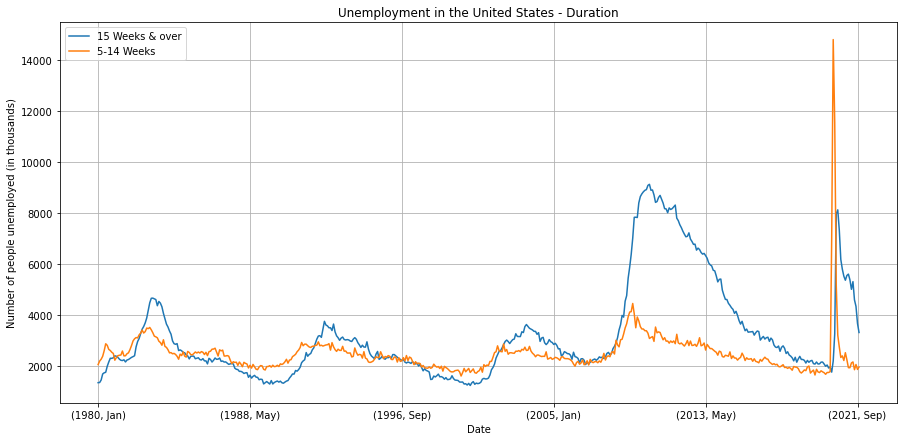

In [9]:
df_duration = get_bls_data_merged(dir_path='./Data/BLS/Duration/', df_merge=get_bls_dummy([1980, 2021]))
df_duration.plot(figsize=(15, 7), linewidth = 1.5)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Number of people unemployed (in thousands)')
plt.title('Unemployment in the United States - Duration')
plt.show()

### Observation

1. From the plot above we can clearly see that duartion for which people are unemployed is not dependent on time. Thus we **accept the null hypothesis.**

### Analyzing the duration for which people are unemployed in the United States during the Great Recession and the Covid-19 pandemic

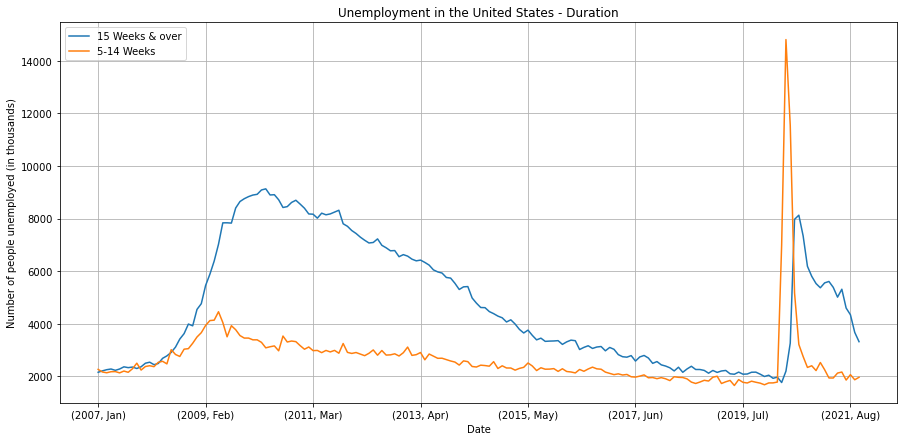

In [10]:
df_duration = get_bls_data_merged(dir_path='./Data/BLS/Duration/', df_merge=get_bls_dummy([2007, 2021]))
df_duration.plot(figsize=(15, 7), linewidth = 1.5)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Number of people unemployed (in thousands)')
plt.title('Unemployment in the United States - Duration')
plt.show()

### Observation

1. We observe that, after the Great Recession, most of the people were unemployed for 15 weeks and over.

2. During the Covid-19 pandemic, the number of people were mostly unemployed for 5 to 14 weeks was much higher than the number of people unemployed for 15 weeks and over.

3. The duration for which people were unemployed was less during the Covid-19 pandemic but the number of people affected was higher during the Covid-19 pandemic as compared to the Great Recession.

## Hypothesis 5: Graduates in the United States prefer to be underemployed rather than staying unemployed

Through this hypothesis we aim to check whether the graduates in the United States prefer to be underemployed rather than staying unemployed or not.


We test the following hypothesis: <br>
**Null Hypothesis: Graduates in the United States prefer to be underemployed rather than staying unemployed <br>
Alternative Hypothesis: Graduates in the United States prefer to be unemployed rather than being underemployed**

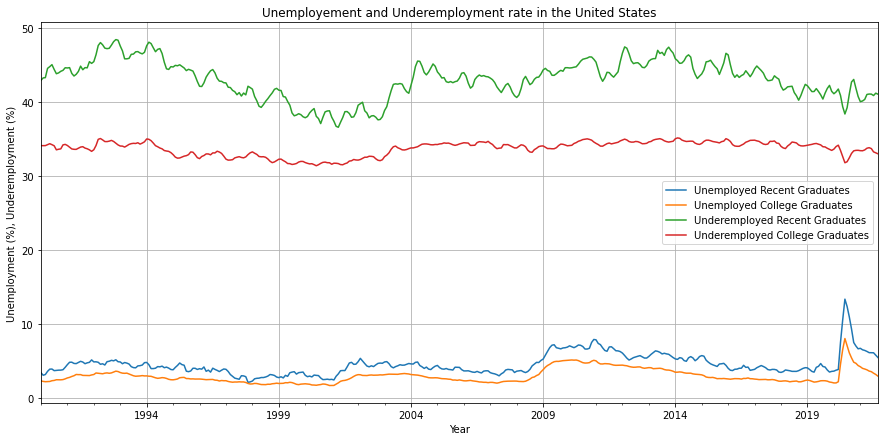

In [11]:
df_unemployed = process_unemployment_underemployed('ch1_unemployment')
df_underemployed = process_unemployment_underemployed('ch2_underemployment')
df_merged = pd.merge(df_unemployed, df_underemployed, left_index=True, right_index=True, how="inner")
df_merged.columns = ['Unemployed Recent Graduates', 'Unemployed College Graduates', 
                     'Underemployed Recent Graduates', 'Underemployed College Graduates']

df_merged.plot(figsize=[15, 7], linewidth=1.5);
plt.title('Unemployement and Underemployment rate in the United States')
plt.xlabel('Year')
plt.ylabel('Unemployment (%), Underemployment (%)')
plt.grid()
plt.show()

### Observation

1. From the plot, the rate of unemployment and underemployment for recent graduates is always high as compared to others. 

2. If we compare the unemployment rate and underemployment rate for graduates, we can say that graduates in the United States prefer to be underemployed rather than stay unemployed. Hence, we can **accept the null hypothesis.**

## Hypothesis 6: Percent change in Job Losses and Job Gain during the Covid-19 pandemic is independent of the state

Through this hypothesis we aim to check whether the percent change in Job Losses and Job Gain is independent of state or not. 


We test the following hypothesis: <br>
**Null Hypothesis: Percent change in Job Losses and Job Gain is independent of state <br>
Alternative Hypothesis: Percent change in Job Losses and Job Gain is NOT independent of state**

Note: For this analysis we have taken data for the first quarter of 2019, 2020 and 2021 for all the states in the United States.

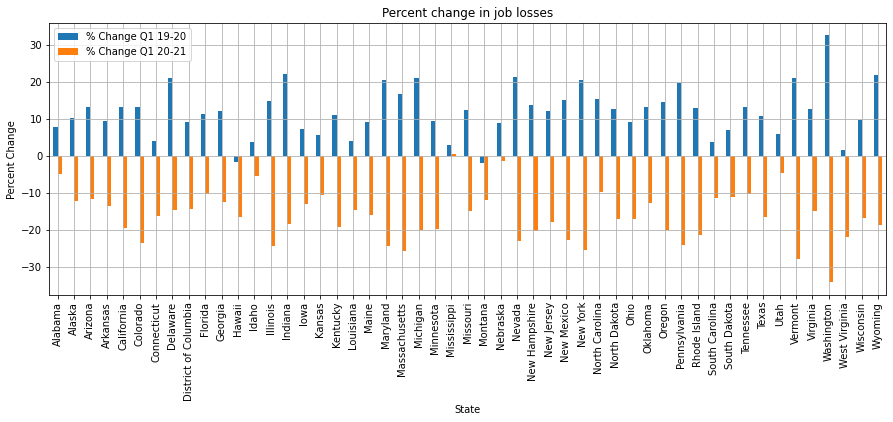

In [12]:
df_job_losses = get_job_loss_gain_df(path='./Data/BLS state job gains and losses/Gross_job_losses.csv')
df_job_losses.plot(y=['% Change Q1 19-20', '% Change Q1 20-21'], use_index=True, kind='bar', figsize=(15, 5))
plt.title('Percent change in job losses')
plt.xlabel('State')
plt.ylabel('Percent Change')
plt.grid()
plt.show()

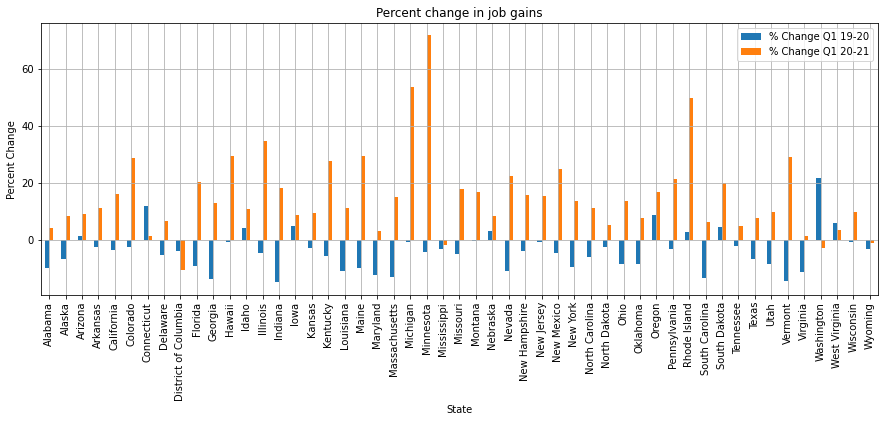

In [13]:
df_job_losses = get_job_loss_gain_df(path='./Data/BLS state job gains and losses/Gross_job_gains.csv')
df_job_losses.plot(y=['% Change Q1 19-20', '% Change Q1 20-21'], use_index=True, kind='bar', figsize=(15, 5))
plt.title('Percent change in job gains')
plt.xlabel('State')
plt.ylabel('Percent Change')
plt.grid()
plt.show()

### Observation

1. From the plots above, we can clearly infer that both the job losses and job gains are dependent on state. For example, percent change in job losses is very large for Washington and very small for Mississippi. Similiarly, the percent change for job gains is very large for Minnesota and very small for Tennessee. 

2. Thus, we can conclude that Percent change in Job Losses and Job Gain is dependent on state and **reject the null hypothesis.** 

3. Also, we notice that there was a decline in percent change for job gain (or increase in percent change for job losses) for the duration March 2019 - March 2020 for almost all the states in the United States due to the Covid-19 pandemic outbreak. In the period March 2020 - March 2021, we see that almost all the states showed increase in the number of jobs i.e. increase in the percent change for job gain (or decline in percent change for job losses).

## Hypothesis 7: There is no relationship between Gross Domestic Product (GDP) and Unemployment Rate 

Through this hypothesis we aim to check whether there is a relationship between the Gross Domestic Product (GDP) and Unemployment Rate or not. 

We test the following hypothesis: <br>
**Null Hypothesis: There is NO relationship between Gross Domestic Product (GDP) and Unemployment Rate <br>
Alternative Hypothesis: There is relationship between Gross Domestic Product (GDP) and Unemployment Rate**

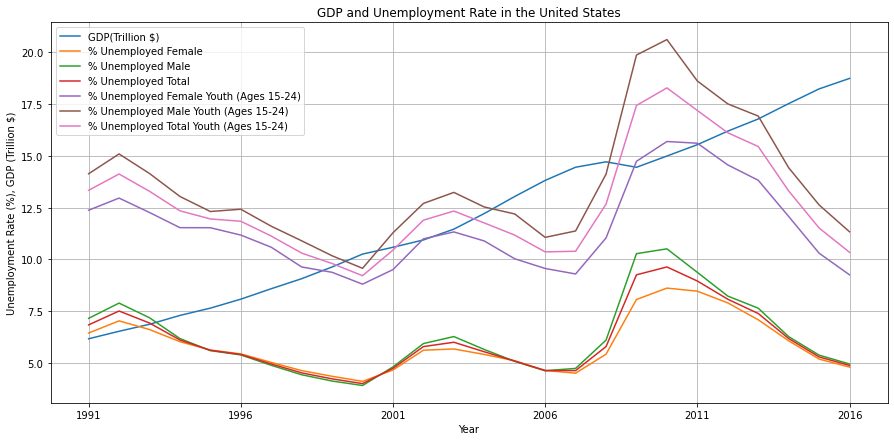

In [14]:
df_gdp_unemployment = get_gdp_unemployment_df(path_gdp='./Data/GDP and Unemployment/GDP.xls',
                                             path_unemp='./Data/GDP and Unemployment/Unemployment.csv')
df_gdp_unemployment.plot(figsize=(15, 7), linewidth=1.5)
plt.title('GDP and Unemployment Rate in the United States')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%), GDP (Trillion $)')
plt.grid()
plt.show()

### Observation

1. From the above plot, we observe that the unemployment rate is inversely related to the GDP. Notice, whenever the GDP increases and the unemployment rate decreases.

2. Around 2003 and during the Great Recession in 2008, there was a slight decrease in the GDP of United States and during both the times we notice that the unemployment rate increases. 

3. Thus, we conclude that there is a relationship between the Gross Domestic Product (GDP) and the Unemployment Rate, and we **reject the null hypothesis.**

## Hypothesis 8: There is no relationship between the President's Political Party and Unemployment Rate

Through this hypothesis we aim to check whether there is a relationship between the President's Political Party and Unemployment Rate.

We test the following hypothesis: <br>
**Null Hypothesis: There is NO relationship between President's Political Party and the Unemployment Rate <br>
Alternative Hypothesis: There is relationship between President's Political Party and the Unemployment Rate**

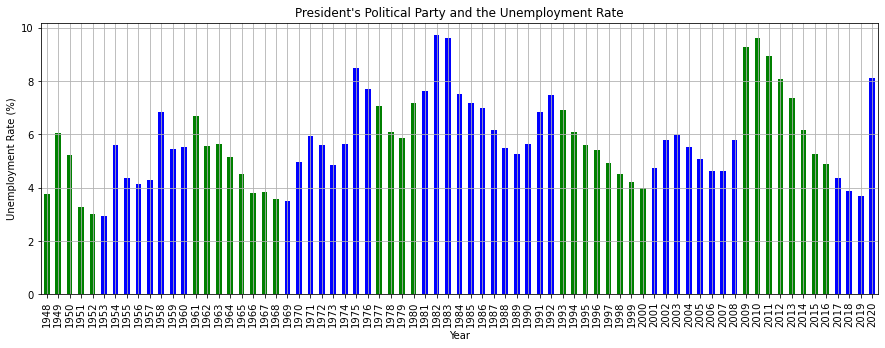

In [15]:
df_unemp = import_bls_excel(directory='./Data/Political Party and Unemployment/', file_name='Unemployment Rate.xlsx')
df_unemp = df_unemp.groupby('Year')['Unemployment Rate'].mean().round(2)

df_president = pd.read_csv('./Data/Political Party and Unemployment/US presidents.csv',
                          dtype={'Years (after inauguration)':'Int16'},
                          names=['Year', 'President', 'Party'],
                          index_col='Year',
                          skiprows=1)

df_president_unemp = pd.merge(df_unemp, df_president, left_index=True, right_index=True, how='inner')

colours = get_party_colour(df_president_unemp['Party'])        
df_president_unemp.plot(y='Unemployment Rate', use_index=True, kind='bar', figsize=(15, 5), color=colours, legend=False)
plt.title("President's Political Party and the Unemployment Rate")
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid()
plt.show()

**In the above plot, Blue colour represents the Republican Party and Green colour represents the Democratic Party**

### Observation

1. Though there are many factors that contribute to the Unemployment rate in the country, from the above plot we notice that most of the times when Democratic Party's President was in power, the unemployment rate reduced. But, there are also some instances when the unemployment rate increased under Democratic Party like in the year 1961, 1980, and 2009.

2. While in the rule of Republican party, we observe that the unemployment rate trend is random.

3. Thus, we can say that there is no relationship between the President's Political Party and the Unemployment Rate in the United States and we **accept the null hypothesis.**

In [16]:
df_president_unemp['Unemployment Rate'] = df_president_unemp['Unemployment Rate'].astype(float)
df_president_unemp.groupby(['Party', 'President'])['Unemployment Rate'].agg([np.max, np.min, np.mean])

amax  amin      mean
Party      President                                 
Democrat   Barack Obama          9.61  4.88  7.447500
           Bill Clinton          6.91  3.97  5.205000
           Harry S. Truman       6.05  3.03  4.264000
           Jimmy Carter          7.18  5.85  6.537500
           John F. Kennedy       6.69  5.57  6.130000
           Lyndon B. Johnson     5.64  3.56  4.416667
Republican Donald J. Trump       8.11  3.68  5.007500
           Dwight D. Eisenhower  6.84  2.92  4.891250
           George Bush           7.49  5.26  6.305000
           George W. Bush        5.99  4.61  5.270000
           Gerald Ford           8.48  5.64  7.273333
           Richard M. Nixon      5.95  3.49  4.976000
           Ronald Reagan         9.71  5.49  7.537500

### Observation

1. The above are some statistics on the Unemployment rate in the United States, President and their Ruling Party. 
2. We see that the highest unemployment rate was under Ronald Reagan's rule of the Republican party while the lowest was under Dwight D. Eisenhower's rule of the Republican party.

## Hypothesis 9: There is no relationship between the population and the Unemployment Rate

Through this hypothesis we aim to check whether there is a relationship between the population and the Unemployment Rate or not. 


We test the following hypothesis: <br>
**Null Hypothesis: There is NO relationship between the population and the Unemployment Rate <br>
Alternative Hypothesis: There is relationship between the population and the Unemployment Rate** <br>

For this analysis we are considering state level data and displaying outcome of the region level. Below we have shown what states we have considered in which region in the United States.

In [17]:
df_state_region = pd.read_csv('./Data/State Population/state_region_division.csv')
df_state_region = df_state_region.groupby('Region')['State']
for key, item in df_state_region:
    print('The states in', key, 'are:', list(item), '\n')

The states in Midwest are: ['Iowa', 'Illinois', 'Indiana', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'North Dakota', 'Nebraska', 'Ohio', 'South Dakota', 'Wisconsin'] 

The states in Northeast are: ['Connecticut', 'Massachusetts', 'Maine', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'] 

The states in South are: ['Alabama', 'Arkansas', 'District of Columbia', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia'] 

The states in West are: ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'New Mexico', 'Nevada', 'Oregon', 'Utah', 'Washington', 'Wyoming'] 



In [18]:
df_state_region_pop = invert_state_df(get_state_region_pop_df(path_1='./Data/State Population/statewise population.csv',
                                                              path_2='./Data/State Population/state_region_division.csv'))

df_state_unemp = get_state_unemp_df(path='./Data/Unemployment Rates for States/state_unemployment_11_21.csv')

In [19]:
df_state_unemp_yearly = df_state_unemp.groupby(['State', 'Year'])['Rate'].mean().reset_index()
df_state_unemp_pop_reg = pd.merge(df_state_unemp_yearly, df_state_region_pop, 
                         left_on=['State', 'Year'], 
                        right_on=['State', 'Year'],
                        how='inner')
df_state_unemp_pop_reg['Population'] = df_state_unemp_pop_reg['Population']/10**6

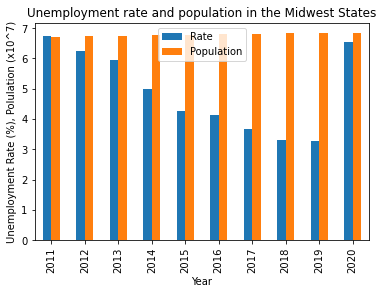

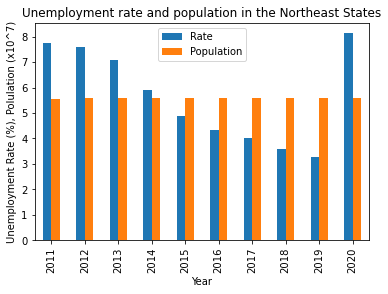

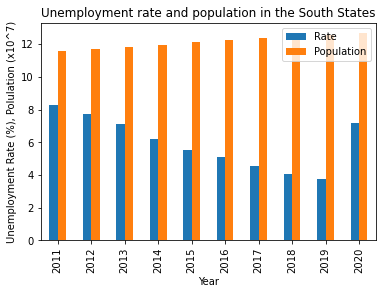

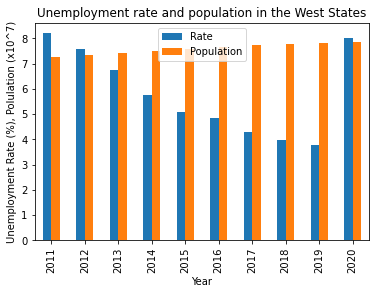

In [20]:
df_rate_pop = df_state_unemp_pop_reg.groupby(['Region','Year'])['Rate','Population'].agg({'Rate':[np.mean], 'Population':[np.sum]}).reset_index()
df_rate_pop.columns = ['Region', 'Year', 'Rate', 'Population']
df_rate_pop['Population'] = df_rate_pop['Population']/10

for region in df_rate_pop['Region'].unique():
    df_rate_pop[df_rate_pop['Region']==region].plot(x='Year', y=['Rate', 'Population'], kind='bar')
    plt.title('Unemployment rate and population in the '+region+' States')
    plt.xlabel('Year')
    plt.ylabel('Unemployment Rate (%), Polulation (x10^7)')
    plt.show()

In [21]:
df_state_unemp_pop_reg.groupby(['Region','Year'])['Rate', 'Population'].agg({'Rate':[np.min,np.max,np.mean],
                                                                  'Population':[np.sum]})

Rate                       Population
                    amin       amax      mean         sum
Region    Year                                           
Midwest   2011  3.200000   9.700000  6.741667   67.164092
          2012  2.933333   9.058333  6.263194   67.348275
          2013  2.891667   9.075000  5.959028   67.576524
          2014  2.616667   7.233333  4.987500   67.765576
          2015  2.783333   5.991667  4.261111   67.885682
          2016  3.016667   5.883333  4.120139   68.018175
          2017  2.675000   4.966667  3.658333   68.160342
          2018  2.475000   4.500000  3.313889   68.263019
          2019  2.308333   4.166667  3.273611   68.340091
          2020  4.250000   9.983333  6.554861   68.316744
Northeast 2011  5.100000  10.966667  7.759259   55.608318
          2012  4.816667  10.216667  7.601852   55.782661
          2013  4.416667   9.475000  7.075926   55.912775
          2014  3.991667   7.766667  5.884259   56.021339
          2015  3.391667   6.025000  4.896296   56.052790
          2016  2.883333   5.341667  4.343519   56.063777
          2017  2.825000   4.966667  4.002778   56.083383
          2018  2.641667   4.483333  3.600926   56.084543
          2019  2.308333   4.450000  3.282407   56.002934
          2020  5.458333  10.083333  8.133333   55.849869
South     2011  5.466667  10.066667  8.301961  116.019483
          2012  5.116667   9.516667  7.727941  117.264196
          2013  5.116667   8.491667  7.117157  118.397213
          2014  4.333333   7.708333  6.214216  119.666248
          2015  4.291667   6.916667  5.543137  121.049223
          2016  3.983333   6.233333  5.092157  122.419547
          2017  3.666667   6.133333  4.521078  123.611036
          2018  2.950000   5.700000  4.038235  124.649156
          2019  2.666667   5.516667  3.774020  125.686544
          2020  6.000000   8.358333  7.169608  126.662754
West      2011  5.800000  12.833333  8.207692   72.791588
          2012  4.775000  11.608333  7.578846   73.482530
          2013  4.208333   9.966667  6.746795   74.173435
          2014  3.633333   8.158333  5.742949   74.933166
          2015  3.416667   6.850000  5.073718   75.751299
          2016  2.891667   6.750000  4.833974   76.570256
          2017  2.216667   6.500000  4.279487   77.267367
          2018  2.358333   5.933333  3.976282   77.841481
          2019  2.433333   5.391667  3.763462   78.300384
          2020  4.700000  13.016667  8.032051   78.654756

### Observation

1. The barplot above represents the mean of the unemployment rates of all states in a region and sum of the population (x10^7) for all the states in that region. The statistics above shows the maximum, minimum and mean of the unemployment rates for all the states in a region and the sum of the population (in Millions) for all the states in that region. 

2. From the barplot and statistics above we notice that in Midwest and Northeast region there is not much significant change in population over the years (2011-2020) while for South and West region there is a notable increase in population in these years. But we notice that for all the regions the unemployment rate decreases from 2011 to 2019. Thus, we conclude that there is no significant relation between the population and the unemployment rate and thus, **we accept the null hypothesis.**

3. In 2020, due to the Covid-19 pandemic there is a rise in the unemployment rate for all the regions in the United States.

### Analyzing the Unemployment Rate in the States of United States - Regionwise from 2011 to 2020

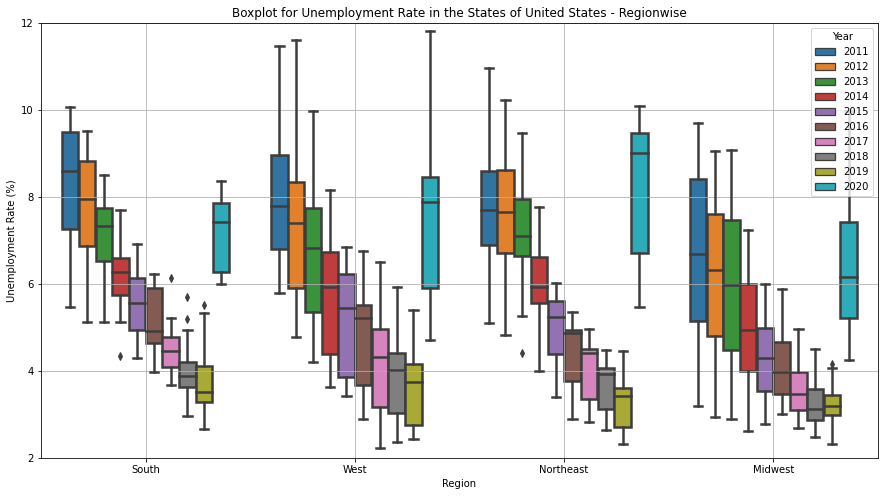

In [22]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=df_state_unemp_pop_reg, x='Region', y='Rate', hue='Year', ax=ax, linewidth=2.5)
plt.title('Boxplot for Unemployment Rate in the States of United States - Regionwise')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Region')
plt.grid()
plt.ylim([2,12])
plt.show()

### Observation

1. In each boxplot above, each data point is the unemployment rate for a state in a particular region for a particular year. For example, the data points for the orange boxplot in the South region would be the unemployment rates for the states in the south region for the year 2012.

2. We can clearly infer from the above plot that for all the regions the boxplot shifts downwards, i.e. the unemployment rate decreases from 2011 to 2019, in 2020 we se a huge surge in the unemployment rate due to the outbreak of the Covid-19 pandemic.

3. Unemployment rate increased the maximum for states in the Northeast region and minimum for states in Midwest due to the Covid-19 pandemic.